<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/EEG_HMC.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [26]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [28]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [29]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,62.731243
1,MedianF_Alpha_F4,625.441584
2,MeanF_Alpha_F4,4186.932107
3,Spectral Edge_Alpha_F4,4760.597022
4,PeakF_Alpha_F4,388.837305
...,...,...
70,MeanP_Gamma_O2,26.248133
71,MedianF_Gamma_O2,539.956987
72,MeanF_Gamma_O2,374.193067
73,Spectral Edge_Gamma_O2,358.426283


In [30]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                     Specs         Score
59           PeakF_Beta_O2  13501.822460
9            PeakF_Beta_F4   8003.136934
34           PeakF_Beta_C4   5144.466182
3   Spectral Edge_Alpha_F4   4760.597022
2           MeanF_Alpha_F4   4186.932107
8    Spectral Edge_Beta_F4   3953.173955
74          PeakF_Gamma_O2   3329.282921
6          MedianF_Beta_F4   3081.298755
28  Spectral Edge_Alpha_C4   2979.921329
27          MeanF_Alpha_C4   2616.797850
33   Spectral Edge_Beta_C4   2465.970531
54          PeakF_Alpha_O2   2117.882320
19          PeakF_Delta_F4   2117.125596
24          PeakF_Gamma_F4   1978.892156
49          PeakF_Gamma_C4   1912.328528
42          MeanF_Delta_C4   1866.515375
53  Spectral Edge_Alpha_O2   1784.013962
69          PeakF_Delta_O2   1687.660593
51        MedianF_Alpha_O2   1576.224952
36        MedianF_Theta_C4   1517.937093


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier()

In [32]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[3.58529208e-05 1.32733163e-02 2.94253328e-02 2.36669065e-02
 1.29974942e-02 2.06349967e-06 3.11239664e-02 2.05538472e-02
 2.29845495e-02 1.59757633e-02 2.37423849e-04 2.22784677e-02
 1.49223677e-02 1.45698672e-02 1.56437803e-02 2.01499558e-03
 5.97502464e-03 2.55774435e-02 1.97918207e-02 1.02701435e-02
 2.08411928e-05 1.72178276e-02 1.44753418e-02 1.17283187e-02
 9.37920362e-03 3.45614118e-05 1.24816898e-02 2.18359796e-02
 1.96630068e-02 1.24607869e-02 2.47228783e-04 2.06980873e-02
 1.86237036e-02 1.88545495e-02 1.25429295e-02 3.48800901e-04
 2.95003205e-02 1.55567242e-02 1.55868937e-02 1.76553564e-02
 2.00963207e-03 9.26069363e-03 2.70663023e-02 2.25167085e-02
 8.71996831e-03 3.29947568e-04 1.36468332e-02 1.27306323e-02
 1.11167315e-02 8.88749984e-03 3.87810588e-05 1.76293632e-02
 1.55784652e-02 1.64677183e-02 1.31794707e-02 3.29194586e-06
 1.54029791e-02 1.52045675e-02 1.49625807e-02 1.32949653e-02
 3.52307178e-04 2.61841434e-02 1.61085082e-02 2.05932462e-02
 1.70015490e-02 2.117937

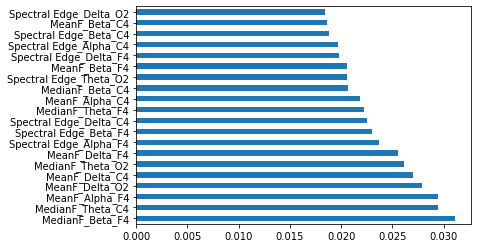

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

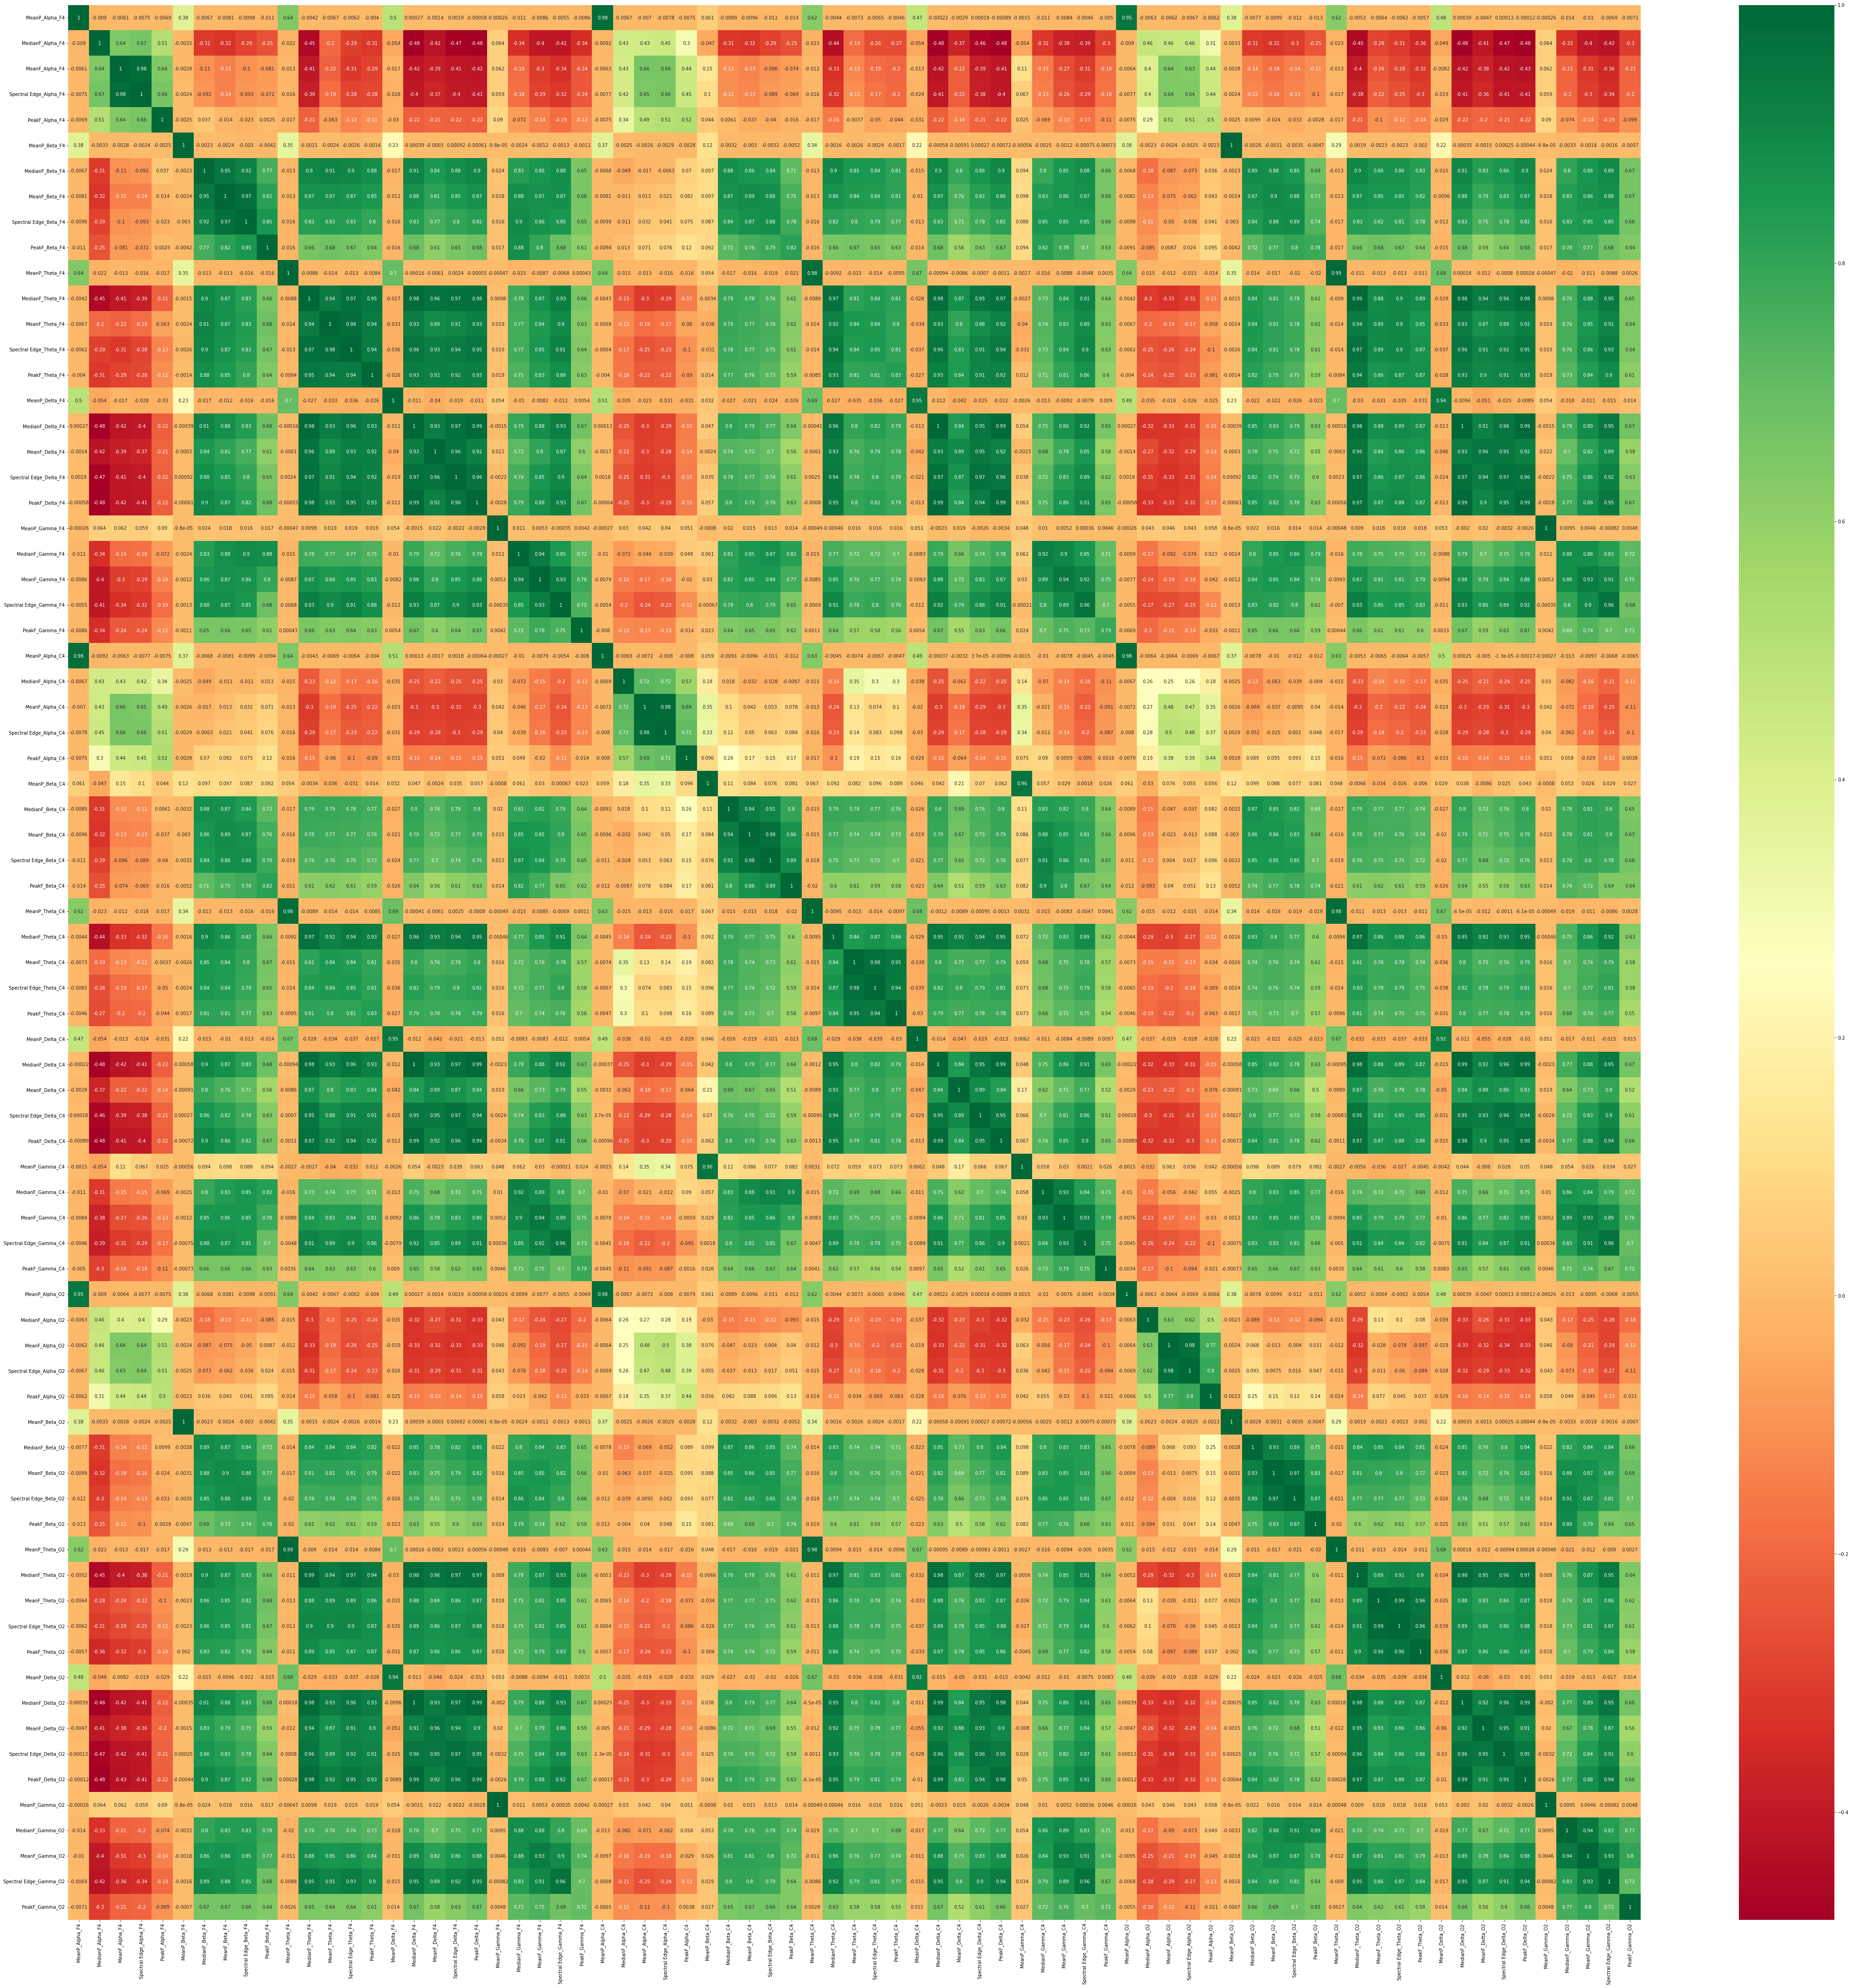

In [24]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")